In [21]:
import pandas as pd

In [25]:
laptopsales=pd.read_csv("D:/MLTraining/MLTraining/MLTraining/Linear Regression/1-Simple Linear Regression/marketingbudgetSales.csv")

In [26]:
laptopsales.head()

,Laptop,Sales
0,202,137
1,194,107
2,214,106
3,136,106
4,68,54


In [27]:
laptopsales.tail()

,Laptop,Sales
49,56,29
50,199,38
51,42,25
52,129,78
53,52,33


In [28]:
laptopsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
Laptop    54 non-null int64
Sales     54 non-null int64
dtypes: int64(2)
memory usage: 944.0 bytes


In [31]:
laptopsales.shape

(54, 2)

In [32]:
laptopsales.describe()

,Laptop,Sales
count,54.000000,54.000000
mean,130.740741,68.629630
std,65.513123,42.784363
min,21.000000,20.000000
25%,71.750000,34.500000
50%,132.500000,53.500000
75%,194.000000,98.250000
max,243.000000,186.000000


import seaborn as sns

#to visualize inside the notebook use this
%matplotlib inline

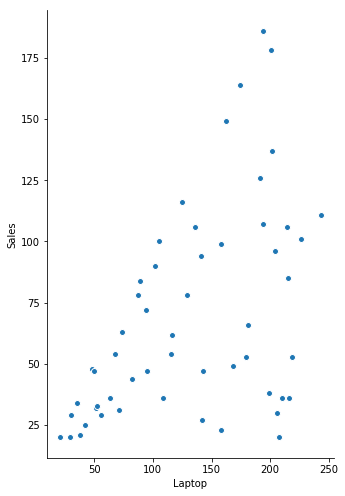

In [37]:
sns.pairplot(laptopsales,x_vars=['Laptop'],y_vars='Sales',size=7,aspect=0.7,kind='scatter')

# Simple Linear Regression

In [39]:
X=laptopsales['Laptop']
X.head()

0    202
1    194
2    214
3    136
4     68
Name: Laptop, dtype: int64

In [40]:
y=laptopsales['Sales']
y.head()

0    137
1    107
2    106
3    106
4     54
Name: Sales, dtype: int64

Split the data into Train and Test Data


In [42]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [43]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [44]:
print(len(X_train))
print(len(X_test))

37
17


In [45]:
print(X_train.shape)

(37,)


In [47]:
import numpy as np
X_train=X_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]

In [49]:
#converted to 2D array
print(X_train.shape)

(37, 1)


In [50]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Performing Linear Regression


In [52]:
from sklearn.linear_model import LinearRegression
#object of linear Regression class lr
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
print(lr.intercept_)
print(lr.coef_)

35.5810511789
[ 0.23976218]


In [55]:
y_pred=lr.predict(X_test)

In [56]:
type(y_pred)

numpy.ndarray

In [57]:
print(y_pred[:5])

[ 93.84325994  78.97800503  82.09491332  78.49848068  85.93110814]


In [58]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)

In [59]:
r_squared=r2_score(y_test,y_pred)

In [60]:
print('Mean Squared Error:',mse)
print('r square value:',r_squared)

Mean Squared Error: 1500.48649876
r square value: 0.345335502045


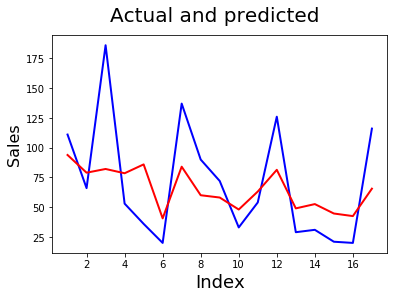

In [62]:
#Actual vs Predicted
import matplotlib.pyplot as plt

c=[i for i in range(1,18,1)]
fig=plt.figure()
plt.plot(c,y_test,color="blue",linewidth=2,linestyle="-")
plt.plot(c,y_pred,color="red",linewidth=2,linestyle="-")
fig.suptitle('Actual and predicted',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Sales',fontsize=16)


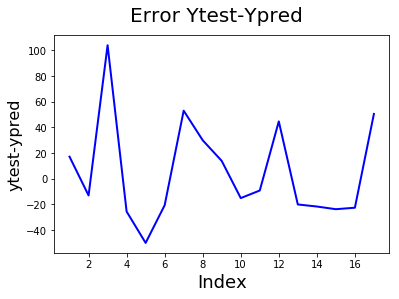

In [63]:
#Error
c=[i for i in range(1,18,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color='blue',linewidth=2,linestyle='-')
fig.suptitle('Error Ytest-Ypred',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('ytest-ypred',fontsize=16)



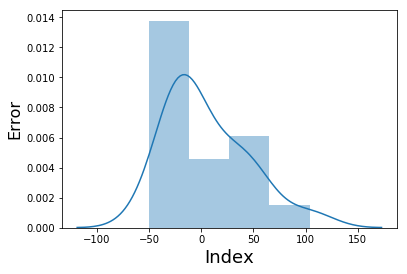

In [65]:
#Distribution of Error
sns.distplot(y_test-y_pred)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Error',fontsize=16)
plt.show()


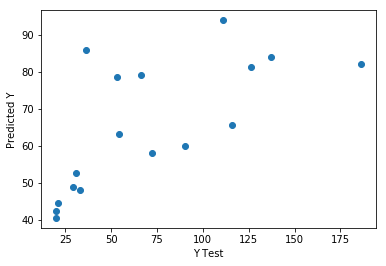

In [66]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')